# Feature Engineering

## Featuretools library

In [53]:
import featuretools as ft
data=ft.demo.load_mock_customer()

In [54]:
data

{'customers':    customer_id zip_code           join_date date_of_birth
 0            1    60091 2011-04-17 10:48:33    1994-07-18
 1            2    13244 2012-04-15 23:31:04    1986-08-18
 2            3    13244 2011-08-13 15:42:34    2003-11-21
 3            4    60091 2011-04-08 20:08:14    2006-08-15
 4            5    60091 2010-07-17 05:27:50    1984-07-28,
 'sessions':     session_id  customer_id   device       session_start
 0            1            2  desktop 2014-01-01 00:00:00
 1            2            5   mobile 2014-01-01 00:17:20
 2            3            4   mobile 2014-01-01 00:28:10
 3            4            1   mobile 2014-01-01 00:44:25
 4            5            4   mobile 2014-01-01 01:11:30
 5            6            1   tablet 2014-01-01 01:23:25
 6            7            3   tablet 2014-01-01 01:39:40
 7            8            4   tablet 2014-01-01 01:55:55
 8            9            1  desktop 2014-01-01 02:15:25
 9           10            2   tablet 20

In [55]:
customers_df=data['customers']
customers_df

,customer_id,zip_code,join_date,date_of_birth
0,1,60091,2011-04-17 10:48:33,1994-07-18
1,2,13244,2012-04-15 23:31:04,1986-08-18
2,3,13244,2011-08-13 15:42:34,2003-11-21
3,4,60091,2011-04-08 20:08:14,2006-08-15
4,5,60091,2010-07-17 05:27:50,1984-07-28


In [56]:
sessions_df=data['sessions']
sessions_df.sample(5)

,session_id,customer_id,device,session_start
13,14,1,tablet,2014-01-01 03:28:00
6,7,3,tablet,2014-01-01 01:39:40
1,2,5,mobile,2014-01-01 00:17:20
28,29,1,mobile,2014-01-01 07:10:05
24,25,3,desktop,2014-01-01 05:59:40


In [57]:
transactions_df=data['transactions']
transactions_df.sample(5)

,transaction_id,session_id,transaction_time,product_id,amount
74,232,5,2014-01-01 01:20:10,1,139.20
231,27,17,2014-01-01 04:10:15,2,90.79
434,36,31,2014-01-01 07:50:10,3,62.35
420,56,30,2014-01-01 07:35:00,3,72.70
54,444,4,2014-01-01 00:58:30,4,43.59


In [58]:
#First, we specify a dictionary with all the entities in our dataset.
entities = {
    'customers':(customers_df,'customer_id'),
    'sessions':(sessions_df,'session_id','session_start'),
    'transactions':(transactions_df,'transaction_id','transaction_time')
}

In [59]:
#Second, we specify how the entities are related:
"""A relationship between a parent and a chile is defined as:
    (parent_entity,parent_variable,child_entity,child_variable)"""
#In this dataset, we have two relationships:
relationships=[('sessions','session_id','transactions','session_id'),
              ('customers','customer_id','sessions','customer_id')]

## Run Deep Feature Synthesis (DFS)
A minimal input to the DFS is a set of entities,a list of relationships, and the 'target_entity' to calculate features for. The output of DFS is a feature matrix and the corresponding list of feature definitions

In [60]:
# First create a matrix for each customer in the data
feature_matrix_customers,features_defs = ft.dfs(entities=entities,
                                               relationships=relationships,
                                               target_entity='customers')
feature_matrix_customers

,zip_code,COUNT(sessions),NUM_UNIQUE(sessions.device),MODE(sessions.device),SUM(transactions.amount),STD(transactions.amount),MAX(transactions.amount),SKEW(transactions.amount),MIN(transactions.amount),MEAN(transactions.amount),...,NUM_UNIQUE(sessions.YEAR(session_start)),MODE(sessions.MONTH(session_start)),MODE(sessions.WEEKDAY(session_start)),MODE(sessions.DAY(session_start)),MODE(sessions.MODE(transactions.product_id)),MODE(sessions.YEAR(session_start)),NUM_UNIQUE(transactions.sessions.customer_id),NUM_UNIQUE(transactions.sessions.device),MODE(transactions.sessions.customer_id),MODE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,,,,,
1,60091,8,3,mobile,9025.62,40.442059,139.43,0.019698,5.81,71.631905,...,1,1,2,1,4,2014,1,3,1,mobile
2,13244,7,3,desktop,7200.28,37.705178,146.81,0.098259,8.73,77.422366,...,1,1,2,1,3,2014,1,3,2,desktop
3,13244,6,3,desktop,6236.62,43.683296,149.15,0.418230,5.89,67.060430,...,1,1,2,1,1,2014,1,3,3,desktop
4,60091,8,3,mobile,8727.68,45.068765,149.95,-0.036348,5.73,80.070459,...,1,1,2,1,1,2014,1,3,4,mobile
5,60091,6,3,mobile,6349.66,44.095630,149.02,-0.025941,7.55,80.375443,...,1,1,2,1,3,2014,1,3,5,mobile


In [61]:
feature_matrix_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 1 to 5
Data columns (total 77 columns):
zip_code                                              5 non-null object
COUNT(sessions)                                       5 non-null int64
NUM_UNIQUE(sessions.device)                           5 non-null int64
MODE(sessions.device)                                 5 non-null object
SUM(transactions.amount)                              5 non-null float64
STD(transactions.amount)                              5 non-null float64
MAX(transactions.amount)                              5 non-null float64
SKEW(transactions.amount)                             5 non-null float64
MIN(transactions.amount)                              5 non-null float64
MEAN(transactions.amount)                             5 non-null float64
COUNT(transactions)                                   5 non-null int64
NUM_UNIQUE(transactions.product_id)                   5 non-null int64
MODE(transactions.product_id)    

One of the reasons DFS is so powerful is that it can create a feature matrix for any entity i our data.

In [62]:
feature_matrix_sessions,feature_defs=ft.dfs(entities=entities,
                                           relationships=relationships,
                                           target_entity='sessions')
feature_matrix_sessions.sample(5)

,customer_id,device,SUM(transactions.amount),STD(transactions.amount),MAX(transactions.amount),SKEW(transactions.amount),MIN(transactions.amount),MEAN(transactions.amount),COUNT(transactions),NUM_UNIQUE(transactions.product_id),...,customers.NUM_UNIQUE(transactions.product_id),customers.MODE(transactions.product_id),customers.DAY(date_of_birth),customers.DAY(join_date),customers.YEAR(date_of_birth),customers.YEAR(join_date),customers.MONTH(date_of_birth),customers.MONTH(join_date),customers.WEEKDAY(date_of_birth),customers.WEEKDAY(join_date)
session_id,,,,,,,,,,,,,,,,,,,,,
34,3,desktop,1477.97,50.110120,148.86,0.011187,14.48,82.109444,18,5,...,5,1,21,13,2003,2011,11,8,4,5
19,3,desktop,944.85,36.167220,126.74,0.531588,6.65,55.579412,17,5,...,5,1,21,13,2003,2011,11,8,4,5
14,1,tablet,1025.63,39.825249,139.09,-0.830975,6.78,85.469167,12,5,...,5,4,18,17,1994,2011,7,4,0,6
33,2,mobile,804.83,28.298415,100.04,-0.763603,8.73,61.910000,13,5,...,5,4,18,15,1986,2012,8,4,0,6
29,1,mobile,1420.09,32.324534,126.11,-1.038434,11.62,88.755625,16,5,...,5,4,18,17,1994,2011,7,4,0,6


## Representing data with EntitySet

In [63]:
transactions_df=transactions_df.merge(sessions_df).merge(customers_df)
transactions_df.sample(10)

,transaction_id,session_id,transaction_time,product_id,amount,customer_id,device,session_start,zip_code,join_date,date_of_birth
454,482,25,2014-01-01 06:04:00,4,57.22,3,desktop,2014-01-01 05:59:40,13244,2011-08-13 15:42:34,2003-11-21
316,283,6,2014-01-01 01:34:15,1,94.93,1,tablet,2014-01-01 01:23:25,60091,2011-04-17 10:48:33,1994-07-18
167,41,32,2014-01-01 08:05:20,3,79.61,5,mobile,2014-01-01 08:02:05,60091,2010-07-17 05:27:50,1984-07-28
275,305,22,2014-01-01 05:26:05,3,131.27,4,desktop,2014-01-01 05:21:45,60091,2011-04-08 20:08:14,2006-08-15
7,192,1,2014-01-01 00:07:35,4,42.27,2,desktop,2014-01-01 00:00:00,13244,2012-04-15 23:31:04,1986-08-18
303,49,4,2014-01-01 01:08:15,1,72.20,1,mobile,2014-01-01 00:44:25,60091,2011-04-17 10:48:33,1994-07-18
50,120,17,2014-01-01 04:01:35,1,62.15,2,tablet,2014-01-01 04:00:30,13244,2012-04-15 23:31:04,1986-08-18
60,397,17,2014-01-01 04:12:25,3,88.97,2,tablet,2014-01-01 04:00:30,13244,2012-04-15 23:31:04,1986-08-18
224,465,11,2014-01-01 02:56:35,5,66.95,4,mobile,2014-01-01 02:47:55,60091,2011-04-08 20:08:14,2006-08-15
467,114,34,2014-01-01 08:25:55,4,25.73,3,desktop,2014-01-01 08:24:50,13244,2011-08-13 15:42:34,2003-11-21


In [64]:
products_df=data['products']
products_df

,product_id,brand
0,1,B
1,2,B
2,3,B
3,4,B
4,5,A


In [65]:
#Creating an EntitySet
es=ft.EntitySet(id='customer_data')

In [66]:
#Load the transactions dataframe as an entity
es=es.entity_from_dataframe(entity_id='transactions',
                           dataframe=transactions_df,
                           index='transaction_id',
                           time_index='transaction_time',
                           variable_types={'product_id':ft.variable_types.Categorical,
                                          'zip_code':ft.variable_types.ZIPCode})
es

Entityset: customer_data
  Entities:
    transactions [Rows: 500, Columns: 11]
  Relationships:
    No relationships

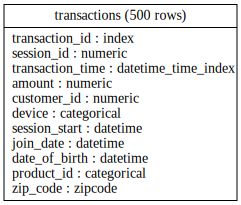

In [67]:
es.plot()

In [68]:
#This method loads each column in the dataframe as as a variable
es['transactions'].variables

[<Variable: transaction_id (dtype = index)>,
 <Variable: session_id (dtype = numeric)>,
 <Variable: transaction_time (dtype: datetime_time_index, format: None)>,
 <Variable: amount (dtype = numeric)>,
 <Variable: customer_id (dtype = numeric)>,
 <Variable: device (dtype = categorical)>,
 <Variable: session_start (dtype: datetime, format: None)>,
 <Variable: join_date (dtype: datetime, format: None)>,
 <Variable: date_of_birth (dtype: datetime, format: None)>,
 <Variable: product_id (dtype = categorical)>,
 <Variable: zip_code (dtype = zipcode)>]

In [69]:
es=es.entity_from_dataframe(entity_id='products',
                            dataframe=products_df,
                            index='product_id')
print(es)
es['products'].variables

Entityset: customer_data
  Entities:
    transactions [Rows: 500, Columns: 11]
    products [Rows: 5, Columns: 2]
  Relationships:
    No relationships


[<Variable: product_id (dtype = index)>,
 <Variable: brand (dtype = categorical)>]

## Adding a relashionship:
Each ft.Realationship must denote a one to many relationship rather that a relationship which is one-to-one or many-to-many

In [70]:
new_relationship=ft.Relationship(es['products']['product_id'],
                                 es['transactions']['product_id'])
es=es.add_relationship(new_relationship)
es

Entityset: customer_data
  Entities:
    transactions [Rows: 500, Columns: 11]
    products [Rows: 5, Columns: 2]
  Relationships:
    transactions.product_id -> products.product_id

## Creating entity from existing table
In order to create a new entity and relationship for sessions, we 'normalize' the transaction entity.

In [71]:
es=es.normalize_entity(base_entity_id='transactions',
                      new_entity_id='sessions',
                      index='session_id',
                      make_time_index='session_start',
                      additional_variables=['device','customer_id','zip_code','session_start','join_date'])
es

Entityset: customer_data
  Entities:
    transactions [Rows: 500, Columns: 6]
    products [Rows: 5, Columns: 2]
    sessions [Rows: 35, Columns: 6]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id

The above code created a new entity sessions based on the 'session_id' and 'session_start' variables.
It added a relationship connecting 'transactions' and 'sessions'.
It removed 'device','customer_id','zip_code' and 'join_date' from transactions and created new variables in the session entity.
It copied and marked 'session_start' as a time index variable.
If the base entity has a time index and make_time_index is not set,normalize entity will create a time index for the new entity. You can set make_time_index=False

In [72]:
es['sessions'].df.head()

,session_id,device,customer_id,zip_code,session_start,join_date
1,1,desktop,2,13244,2014-01-01 00:00:00,2012-04-15 23:31:04
2,2,mobile,5,60091,2014-01-01 00:17:20,2010-07-17 05:27:50
3,3,mobile,4,60091,2014-01-01 00:28:10,2011-04-08 20:08:14
4,4,mobile,1,60091,2014-01-01 00:44:25,2011-04-17 10:48:33
5,5,mobile,4,60091,2014-01-01 01:11:30,2011-04-08 20:08:14


In [73]:
es['transactions'].df.head()

,transaction_id,session_id,transaction_time,amount,date_of_birth,product_id
298,298,1,2014-01-01 00:00:00,127.64,1986-08-18,5
2,2,1,2014-01-01 00:01:05,109.48,1986-08-18,2
308,308,1,2014-01-01 00:02:10,95.06,1986-08-18,3
116,116,1,2014-01-01 00:03:15,78.92,1986-08-18,4
371,371,1,2014-01-01 00:04:20,31.54,1986-08-18,3


In [74]:
es=es.normalize_entity(base_entity_id='sessions',
                      new_entity_id='customers',
                      index='customer_id',
                      make_time_index='join_date',
                      additional_variables=['zip_code','join_date'])
es

Entityset: customer_data
  Entities:
    transactions [Rows: 500, Columns: 6]
    products [Rows: 5, Columns: 2]
    sessions [Rows: 35, Columns: 4]
    customers [Rows: 5, Columns: 3]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id
    sessions.customer_id -> customers.customer_id

## Using the EntitySet

In [75]:
feature_matrix,feature_defs=ft.dfs(entityset=es,
                                  target_entity='products')
feature_matrix

,brand,SUM(transactions.amount),STD(transactions.amount),MAX(transactions.amount),SKEW(transactions.amount),MIN(transactions.amount),MEAN(transactions.amount),COUNT(transactions),NUM_UNIQUE(transactions.session_id),MODE(transactions.session_id),...,MODE(transactions.YEAR(date_of_birth)),MODE(transactions.DAY(date_of_birth)),MODE(transactions.sessions.device),MODE(transactions.DAY(transaction_time)),MODE(transactions.MONTH(date_of_birth)),MODE(transactions.MONTH(transaction_time)),MODE(transactions.sessions.customer_id),MODE(transactions.YEAR(transaction_time)),MODE(transactions.WEEKDAY(date_of_birth)),MODE(transactions.WEEKDAY(transaction_time))
product_id,,,,,,,,,,,,,,,,,,,,,
1,B,7489.79,42.479989,149.56,0.125525,6.84,73.429314,102,34,3,...,1994,18,desktop,1,7,1,1,2014,0,2
2,B,7021.43,46.336308,149.95,0.151934,5.73,76.319891,92,34,28,...,2006,18,desktop,1,8,1,4,2014,0,2
3,B,7008.12,38.871405,148.31,0.223938,5.89,73.001250,96,35,1,...,2006,18,desktop,1,8,1,4,2014,0,2
4,B,8088.97,42.492501,146.46,-0.132077,5.81,76.311038,106,34,29,...,1994,18,desktop,1,7,1,1,2014,0,2
5,A,7931.55,42.131902,149.02,0.098248,5.91,76.264904,104,34,4,...,1994,18,mobile,1,7,1,1,2014,0,2


The features from DFS use the relational structure of the entity set. Therefore, it is important to think carefully about the entities we create

## Deep Feature Synthesis
Is an automated method for performing feature engineering on relational and temporal data.(temporal databases store data relating to time instances.

In [76]:
es=ft.demo.load_mock_customer(return_entityset=True)
es

Entityset: transactions
  Entities:
    transactions [Rows: 500, Columns: 5]
    products [Rows: 5, Columns: 2]
    sessions [Rows: 35, Columns: 4]
    customers [Rows: 5, Columns: 4]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id
    sessions.customer_id -> customers.customer_id

In [77]:
feature_matrix,feature_defs=ft.dfs(entityset=es,
                                  target_entity='customers',
                                  agg_primitives=['count'],
                                  trans_primitives=['month'],
                                  max_depth=1)
feature_matrix

,zip_code,COUNT(sessions),MONTH(date_of_birth),MONTH(join_date)
customer_id,,,,
5,60091,6,7,7
4,60091,8,8,4
1,60091,8,7,4
3,13244,6,11,8
2,13244,7,8,4


'count' is an aggregation primitive because it computes a single value based on many sessions related to one customer. 'month. is a transform primitive because it takes one value for a customer and transforms it into another.
## Creating 'Deep Features'
The DFS algorithm stacks primitives to generate more complex features. Each time we stack a primitive, we increase the 'depth' of a feature

In [78]:
feature_matrix,feature_defs=ft.dfs(entityset=es,
                                  target_entity='customers',
                                  agg_primitives=['mean','sum','mode'],
                                  trans_primitives=['month','hour'],
                                  max_depth=2)
feature_matrix

,zip_code,MODE(sessions.device),MEAN(transactions.amount),SUM(transactions.amount),MODE(transactions.product_id),MONTH(date_of_birth),MONTH(join_date),HOUR(date_of_birth),HOUR(join_date),MEAN(sessions.SUM(transactions.amount)),MEAN(sessions.MEAN(transactions.amount)),SUM(sessions.MEAN(transactions.amount)),MODE(sessions.MONTH(session_start)),MODE(sessions.MODE(transactions.product_id)),MODE(sessions.HOUR(session_start)),MODE(transactions.sessions.customer_id),MODE(transactions.sessions.device)
customer_id,,,,,,,,,,,,,,,,,
5,60091,mobile,80.375443,6349.66,5,7,7,0,5,1058.276667,78.705187,472.231119,1,3,0,5,mobile
4,60091,mobile,80.070459,8727.68,2,8,4,0,20,1090.960000,81.207189,649.657515,1,1,1,4,mobile
1,60091,mobile,71.631905,9025.62,4,7,4,0,10,1128.202500,72.774140,582.193117,1,4,6,1,mobile
3,13244,desktop,67.060430,6236.62,1,11,8,0,15,1039.436667,67.539577,405.237462,1,1,5,3,desktop
2,13244,desktop,77.422366,7200.28,4,8,4,0,23,1028.611429,78.415122,548.905851,1,3,3,2,desktop


In [79]:
feature_matrix[['MEAN(sessions.SUM(transactions.amount))']]

,MEAN(sessions.SUM(transactions.amount))
customer_id,
5,1058.276667
4,1090.960000
1,1128.202500
3,1039.436667
2,1028.611429


This calculates the sum of all transaction amounts per session to get the total amount per session. It then applies the mean to the total amounts across multiple sessions to identify the average amount per session. We call this feature a <b> deep feature</b> with a depth of two

In [80]:
feature_matrix[['MODE(sessions.HOUR(session_start))']]

,MODE(sessions.HOUR(session_start))
customer_id,
5,0
4,1
1,6
3,5
2,3


Stacking results in features that are more expressive that individual primitives themselves. This enables the automatic creation of complex patterns for machine learning.
## Changing Target Entity

In [81]:
feature_matrix,feature_defs=ft.dfs(entityset=es,
                                  target_entity='sessions',
                                  agg_primitives=['mean','sum','mode'],
                                  trans_primitives=['month','hour'],
                                  max_depth=2)
feature_matrix.head()

,customer_id,device,MEAN(transactions.amount),SUM(transactions.amount),MODE(transactions.product_id),MONTH(session_start),HOUR(session_start),customers.zip_code,MODE(transactions.MONTH(transaction_time)),MODE(transactions.HOUR(transaction_time)),MODE(transactions.products.brand),customers.MODE(sessions.device),customers.MEAN(transactions.amount),customers.SUM(transactions.amount),customers.MODE(transactions.product_id),customers.MONTH(date_of_birth),customers.MONTH(join_date),customers.HOUR(date_of_birth),customers.HOUR(join_date)
session_id,,,,,,,,,,,,,,,,,,,
1,2,desktop,76.813125,1229.01,3,1,0,13244,1,0,B,desktop,77.422366,7200.28,4,8,4,0,23
2,5,mobile,74.696000,746.96,5,1,0,60091,1,0,A,mobile,80.375443,6349.66,5,7,7,0,5
3,4,mobile,88.600000,1329.00,1,1,0,60091,1,0,B,mobile,80.070459,8727.68,2,8,4,0,20
4,1,mobile,64.557200,1613.93,5,1,0,60091,1,0,B,mobile,71.631905,9025.62,4,7,4,0,10
5,4,mobile,70.638182,777.02,5,1,1,60091,1,1,B,mobile,80.070459,8727.68,2,8,4,0,20


## Feature Primitives
They define individual computations that can be applied to raw datasets to create new features. For example, to calculate the average time between events:

In [82]:
feature_defs = ft.dfs(entityset=es,
                     target_entity='customers',
                     agg_primitives=['mean'],
                     trans_primitives=['time_since_previous'],
                     features_only=True)# Only return feature definitions as output.
feature_defs

[<Feature: zip_code>,
 <Feature: MEAN(transactions.amount)>,
 <Feature: TIME_SINCE_PREVIOUS(join_date)>,
 <Feature: MEAN(sessions.TIME_SINCE_PREVIOUS(session_start))>,
 <Feature: MEAN(sessions.MEAN(transactions.amount))>]

In [83]:
feature_matrix,feature_defs = ft.dfs(entityset=es,
                                     target_entity='customers',
                                     agg_primitives=['mean','max','min','std','skew'],
                                     trans_primitives=['time_since_previous'])
feature_matrix[["MEAN(sessions.TIME_SINCE_PREVIOUS(session_start))",
                "MAX(sessions.TIME_SINCE_PREVIOUS(session_start))",
                "MIN(sessions.TIME_SINCE_PREVIOUS(session_start))",
                "STD(sessions.TIME_SINCE_PREVIOUS(session_start))",
                "SKEW(sessions.TIME_SINCE_PREVIOUS(session_start))"]]                                    

,MEAN(sessions.TIME_SINCE_PREVIOUS(session_start)),MAX(sessions.TIME_SINCE_PREVIOUS(session_start)),MIN(sessions.TIME_SINCE_PREVIOUS(session_start)),STD(sessions.TIME_SINCE_PREVIOUS(session_start)),SKEW(sessions.TIME_SINCE_PREVIOUS(session_start))
customer_id,,,,,
5,1007.500000,1170.0,715.0,157.884451,-1.507217
4,999.375000,1625.0,650.0,308.688904,1.065177
1,966.875000,1170.0,715.0,171.754341,-0.254557
3,888.333333,1170.0,650.0,177.613813,0.434581
2,725.833333,975.0,520.0,194.638554,0.162631


## Aggregation vs Transform

In [84]:
ft.list_primitives().sample(20)

,name,type,description
16,first,aggregation,Determines the first value in a list.
69,weekday,transform,Determines the day of the week from a datetime.
56,divide_numeric,transform,Element-wise division of two lists.
53,latitude,transform,Returns the first tuple value in a list of Lat...
58,is_weekend,transform,Determines if a date falls on a weekend.
57,subtract_numeric_scalar,transform,Subtract a scalar from each element in the list.
49,time_since_previous,transform,Compute the time since the previous entry in a...
13,any,aggregation,Determines if any value is 'True' in a list.
77,cum_mean,transform,Calculates the cumulative mean.
40,longitude,transform,Returns the second tuple value in a list of La...


## Defining custom primitives

In [85]:
from featuretools.primitives import make_agg_primitive,make_trans_primitive
from featuretools.variable_types import Text, Numeric

In [86]:
def absolute(column):
    return abs(column)

In [87]:
Absolute = make_trans_primitive(function=absolute,
                               input_types=[Numeric],
                               return_type=Numeric)

In [88]:
def maximum(column):
    return max(column)

In [89]:
Maximum = make_agg_primitive(function=maximum,
                            input_types=[Numeric],
                            return_type = Numeric)

In [90]:
feature_matrix,feature_defs=ft.dfs(entityset=es,
                                  target_entity='sessions',
                                  agg_primitives=[Maximum],
                                  trans_primitives=[Absolute],
                                  max_depth = 2)
feature_matrix[['customers.MAXIMUM(transactions.amount)',
               'MAXIMUM(transactions.ABSOLUTE(amount))']].head()

,customers.MAXIMUM(transactions.amount),MAXIMUM(transactions.ABSOLUTE(amount))
session_id,,
1,146.81,141.66
2,149.02,135.25
3,149.95,147.73
4,139.43,129.00
5,149.95,139.20


In [91]:
def word_count(column):
    """
    Counts the number of words in each row of the column. Returns a list of the counts for each row.
    """
    word_counts=[]
    for value in column:
        words= value.split(None)
        word_counts.append(len(words))
    return word_counts

In [92]:
WordCount = make_trans_primitive(function=word_count,
                                input_types = [Text],
                                return_type=Numeric)

In [93]:
from featuretools.tests.testing_utils import make_ecommerce_entityset
es=make_ecommerce_entityset()

In [94]:
feature_matrix, feature_defs = ft.dfs(entityset=es,
                                     target_entity='sessions',
                                     agg_primitives=['sum','mean','std'],
                                     trans_primitives=[WordCount])
feature_matrix[['customers.WORD_COUNT(favorite_quote)',
               'STD(log.WORD_COUNT(comments))',
               'SUM(log.WORD_COUNT(comments))',
               'MEAN(log.WORD_COUNT(comments))']]

,customers.WORD_COUNT(favorite_quote),STD(log.WORD_COUNT(comments)),SUM(log.WORD_COUNT(comments)),MEAN(log.WORD_COUNT(comments))
id,,,,
0,9,540.436860,2500,500
1,9,583.702550,1732,433
2,9,NaN,246,246
3,6,883.883476,1256,628
4,6,0.000000,9,3
5,12,19.798990,68,34


If a primitive requires multiple features as input, input_types has multiple element.

In [118]:
es=ft.demo.load_mock_customer(return_entityset=True)
es

Entityset: transactions
  Entities:
    transactions [Rows: 500, Columns: 5]
    products [Rows: 5, Columns: 2]
    sessions [Rows: 35, Columns: 4]
    customers [Rows: 5, Columns: 4]
  Relationships:
    transactions.product_id -> products.product_id
    transactions.session_id -> sessions.session_id
    sessions.customer_id -> customers.customer_id

In [119]:
from featuretools.variable_types import Datetime, Timedelta, Variable
import pandas as pd

def mean_sunday(numeric,datetime):
    """
    Finds the mean of non-null values of a feature that occured on Sundays.
    """
    days=pd.DatetimeIndex(datetime).weekday.values
    df=pd.DataFrame({'numeric': numeric,'time':days})
    return df[df['time'] == 6]['numeric'].mean()

In [120]:
MeanSunday = make_agg_primitive(function=mean_sunday,
                               input_types=[Numeric,Datetime],
                               return_type=[Numeric])

In [121]:
feature_matrix,feature_defs=ft.dfs(entityset=es,
                               target_entity='sessions',
                               agg_primitives=[MeanSunday],
                               trans_primitives=[],
                               max_depth=1)
feature_matrix[['MEAN_SUNDAY(log.value,datetime)','MEAN_SUNDAY(log.value_2,datetime)']]

TypeError: issubclass() arg 1 must be a class

## Handling time
Time index is the column in the data that specifies when the data in each row became known.
<b>Cutoff Time</b> specifies the last point in time that a row's data can be used for a feature calculation

In [122]:
fm,features = ft.dfs(entityset=es,
                    target_entity='customers',
                    cutoff_time=pd.Timestamp('2014-1-1 04:00'),
                    instance_ids = [1,2,3],
                    cutoff_time_in_index=True)
fm

,,zip_code,COUNT(sessions),NUM_UNIQUE(sessions.device),MODE(sessions.device),SUM(transactions.amount),STD(transactions.amount),MAX(transactions.amount),SKEW(transactions.amount),MIN(transactions.amount),MEAN(transactions.amount),...,NUM_UNIQUE(sessions.YEAR(session_start)),MODE(sessions.MONTH(session_start)),MODE(sessions.WEEKDAY(session_start)),MODE(sessions.DAY(session_start)),MODE(sessions.MODE(transactions.product_id)),MODE(sessions.YEAR(session_start)),NUM_UNIQUE(transactions.sessions.customer_id),NUM_UNIQUE(transactions.sessions.device),MODE(transactions.sessions.customer_id),MODE(transactions.sessions.device)
customer_id,time,,,,,,,,,,,,,,,,,,,,,
1,2014-01-01 04:00:00,60091,4,3,tablet,4958.19,42.309717,139.23,-0.006928,5.81,74.002836,...,1,1,2,1,4,2014,1,3,1,tablet
2,2014-01-01 04:00:00,13244,4,2,desktop,4150.30,39.289512,146.81,-0.134786,12.07,84.700000,...,1,1,2,1,2,2014,1,2,2,desktop
3,2014-01-01 04:00:00,13244,1,1,tablet,941.87,47.264797,146.31,0.618455,8.19,62.791333,...,1,1,2,1,1,2014,1,1,3,tablet


To specify a unique cutoff time for each row of the resulting feature matrix,we can pass a dataframe where the first column is the instance id and the and the second column is the corresponding cutoff time.

In [123]:
cutoff_times=pd.DataFrame()
cutoff_times['customer_id']=[1,2,3,1]
cutoff_times['time']=pd.to_datetime(['2014-1-1 04:00',
                                    '2014-1-1 05:00',
                                    '2014-1-1 06:00',
                                    '2014-1-1 08:00'])
cutoff_times['label']=[True,True,False,True]
cutoff_times

,customer_id,time,label
0,1,2014-01-01 04:00:00,True
1,2,2014-01-01 05:00:00,True
2,3,2014-01-01 06:00:00,False
3,1,2014-01-01 08:00:00,True


In [124]:
fm,features = ft.dfs(entityset=es,
                    target_entity='customers',
                    cutoff_time=cutoff_times,
                    cutoff_time_in_index=True)
fm

,,zip_code,COUNT(sessions),NUM_UNIQUE(sessions.device),MODE(sessions.device),SUM(transactions.amount),STD(transactions.amount),MAX(transactions.amount),SKEW(transactions.amount),MIN(transactions.amount),MEAN(transactions.amount),...,MODE(sessions.MONTH(session_start)),MODE(sessions.WEEKDAY(session_start)),MODE(sessions.DAY(session_start)),MODE(sessions.MODE(transactions.product_id)),MODE(sessions.YEAR(session_start)),NUM_UNIQUE(transactions.sessions.customer_id),NUM_UNIQUE(transactions.sessions.device),MODE(transactions.sessions.customer_id),MODE(transactions.sessions.device),label
customer_id,time,,,,,,,,,,,,,,,,,,,,,
1,2014-01-01 04:00:00,60091,4,3,tablet,4958.19,42.309717,139.23,-0.006928,5.81,74.002836,...,1,2,1,4,2014,1,3,1,tablet,True
2,2014-01-01 05:00:00,13244,5,2,desktop,5155.26,38.047944,146.81,-0.121811,12.07,83.149355,...,1,2,1,2,2014,1,2,2,desktop,True
3,2014-01-01 06:00:00,13244,4,2,desktop,2867.69,40.349758,146.31,0.318315,6.65,65.174773,...,1,2,1,1,2014,1,2,3,desktop,False
1,2014-01-01 08:00:00,60091,8,3,mobile,9025.62,40.442059,139.43,0.019698,5.81,71.631905,...,1,2,1,4,2014,1,3,1,mobile,True


## Training Window
We can restrict the amount of historical data that is selected for calculations using a <b>'training window'

In [126]:
window_fm,window_features = ft.dfs(entityset=es,
                                  target_entity='customers',
                                  cutoff_time=cutoff_times,
                                  cutoff_time_in_index=True,
                                  training_window='2 hour')
window_fm

,,zip_code,COUNT(sessions),NUM_UNIQUE(sessions.device),MODE(sessions.device),SUM(transactions.amount),STD(transactions.amount),MAX(transactions.amount),SKEW(transactions.amount),MIN(transactions.amount),MEAN(transactions.amount),...,MODE(sessions.MONTH(session_start)),MODE(sessions.WEEKDAY(session_start)),MODE(sessions.DAY(session_start)),MODE(sessions.MODE(transactions.product_id)),MODE(sessions.YEAR(session_start)),NUM_UNIQUE(transactions.sessions.customer_id),NUM_UNIQUE(transactions.sessions.device),MODE(transactions.sessions.customer_id),MODE(transactions.sessions.device),label
customer_id,time,,,,,,,,,,,,,,,,,,,,,
1,2014-01-01 04:00:00,60091,2,2,desktop,2077.66,43.772157,139.09,-0.187686,5.81,76.950370,...,1,2,1,1,2014,1,2,1,desktop,True
2,2014-01-01 05:00:00,13244,3,2,desktop,2605.61,36.077146,146.81,-0.198611,12.07,84.051935,...,1,2,1,1,2014,1,2,2,desktop,True
3,2014-01-01 06:00:00,13244,3,1,desktop,1925.82,37.130891,128.26,0.110145,6.65,66.407586,...,1,2,1,1,2014,1,1,3,desktop,False
1,2014-01-01 08:00:00,60091,3,2,mobile,3124.15,38.952172,139.43,0.047120,5.91,66.471277,...,1,2,1,1,2014,1,2,1,mobile,True


In [127]:
fm[['COUNT(transactions)']]

,,COUNT(transactions)
customer_id,time,
1,2014-01-01 04:00:00,67
2,2014-01-01 05:00:00,62
3,2014-01-01 06:00:00,44
1,2014-01-01 08:00:00,126


In [128]:
window_fm[['COUNT(transactions)']]

,,COUNT(transactions)
customer_id,time,
1,2014-01-01 04:00:00,27
2,2014-01-01 05:00:00,31
3,2014-01-01 06:00:00,29
1,2014-01-01 08:00:00,47


## Other common Feature Engineering Techniques are:
<ol>
    <li>Imputation</li>
    <li>Anomaly Detection and Resolution - Handling outliers</li>
    <li>Binning</li>
    <li>Log transform</li>
    <li>One-Hot Encoding</li>
    <li>Grouping Operations</li>
    <li>Feature Split</li>
    <li>Scalling</li>
    <li>Extracting Time Data</li>
</ol>


## Imputation

In [ ]:
# Dropping with optimum threshold

threshhold = 0.7
#Dropping columns and rows with missing value rate higher than threshold
data = data[data.columns[data.isnull().mean()< threshold]]
data = data[data.loc[data.isnull().mean(axis=1)<threshold]]

#Filling all missing values with zeros
data= data.fillna(0)
#Filling missing values with medians of the columns
data=fata.fillna(data.median())

#Max fill function for categorical columns
data['column_name'].fillna(data['column_name'].value_counts().idxmax(),inplace = True)

## Handling Outliers
Best way is to detect them visually

In [ ]:
#Dropping the outlier rows with standard deviation
factor = 3
upper_lim=data['column'].mean()+ data['column'].std()*factor
lower_lim=data['column'].mean()- data['column'].std()*factor

data= data[(data['column']<upper_lim)& (data['column']>lower_lim)]

#Or you can use the z-score -(standard score)
from scipy.stats import zscore

#Dropping outlier rows with Percentiles
upper_lim = data['column'].quantile(.95)
lower_lim = data['column'].quanntile(.05)

data=data[(data['column']<upper_lim)&(data['column']>lower_lim)]

#Capping the outlier rows with percentiles
upper_lim = data['column'].quantile(.95)
lower_lim = data['column'].quanntile(.05)

data.loc[(df['column']>upper_lim),column]= upper_lim
data.loc[(df['column']<lower_lim),column]=lower_lim

## Binning
Best for categorical columns, esp the labels with low frequencies since they affect the model negatively. For numerical columns,binning may be redundant for some algorithms due to its effecyt on model performance.


In [ ]:
#Numerical binning example
data['bin'] = pd.cut(data['value'],bins=[0,30,70,100],labels=['Low','Medium','High'])

#Categorical binning
conditions = [
    data['Country'].str.contains('Spain'),
    data['Country'].str.contains('Italy'), 
    data['Country'].str.contains('Chile'), 
    data['Country'].str.contains('Brazil')
]
choices = ['Europe','Europe','South America','South America']

data['Continent'] = np.select(conditions,choices,default = 'Other')

## Log Transform
It helps handle skewed data and after transformation,the distribution becomes more approximate to normal.<br>
Normalizes magnitude differences within the range of the data eg between ages (15-10) and (65-70)<br>
Decreases the effects of outliers.
The data you apply log transform to must have only positive values. 

In [4]:
import pandas as pd
import numpy as np
#Log transform example
data = pd.DataFrame({'value':[2,45,-23,85,28,2,35,-12]})

data['log+1']=(data['value']+1).transform(np.log)

#Negative values handling
data['log'] = (data['value']-data['value'].min()+1).transform(np.log)


## 0ne-Hot Encoding

## Grouping Operations

In [ ]:
"""Categirical column grouping:"""
#Max operation:
data.groupby('id').agg(lambda x: x.value(counts().index[0]))

#Making a pivot table
data.pivot_table(index='column_to_group',values='aggregation_column',aggfunc = np.sum,fill_value=0)

#Apply a group by function after applying one-hot encoding.This method preserves all the data, and you transform
#the categorical column to numeric without losing any data

"""Numerical Column Grouping"""
#sum_cols:List of columns to sum
#mean_cols: List of Columns to average

grouped = gata.groupby('column_to_group')

sums = grouped[sum_cols].sum().add_suffix('_sum')
avgs = grouped[mean_cols].mean().add_suffix('_avg')

new_df=pd.concat([sums,avgs],axis = 1)

## Feature Split

In [8]:
#Splitting the name column
#data.name.str.split("").map(lambda x:x[0]) #Extracting first names
#data.name.str.split("").map(lambda x:x[-1]) #Extracting last names

data = pd.DataFrame({'Title':['Toy Story (1995)','Jumanji (1996)']})
data.Title.str.split("(",n=1,expand=True)[1].str.split(")",n=1,expand=True)[0]

0    1995
1    1996
Name: 0, dtype: object

## Scaling
Algorithms based on distance calculations eg k-NN need to have scaled continuous features an model input.<br>

In [10]:
"""Normalization(min-max normalization):- Scale all values in a fixed range between 0 and 1. The effects of the
outliers increases due to decreased standard deviations, so handle them before normalization"""

data = pd.DataFrame({'value':[2,45,-23,85,28,2,35,-12]})
data['normalized'] = (data['value']-data['value'].min())/(data['value'].max()-data['value'].min())

#Standardization := z-score normaliation, scales the values while taking into account standard deviations
data['standardized'] = (data['value']-data['value'].mean())/data['value'].std()
data

,value,normalized,standardized
0,2,0.231481,-0.518878
1,45,0.629630,0.703684
2,-23,0.000000,-1.229670
3,85,1.000000,1.840952
4,28,0.472222,0.220346
5,2,0.231481,-0.518878
6,35,0.537037,0.419367
7,-12,0.101852,-0.916922


## Extracting Date
Extract parts of the date into year,month,day,etc<br>
Extracting the time periods between current date and columns in terms of years, months,etc<br>
Extracting specific featured from the date:Nme of the weekday, Weekend or not, Holiday or not
    

In [ ]:
#Transform string to date:
data['date'] = pd.to_datetime(data.date, format = "%d-%m-%Y")

#Extracting parts of the date
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

#Extracting time passed since date:
data['passed_years'] = date.today().year - data['date'].dt.year
data['passed_months'] = (date.today().year - data['date'].dt.year)*12+date.today().month-data['date'].dt.month

#Extracting the weekday name
data['day_name'] = data['date'].dt.day_name()